In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%run finance.ipynb

names = ['S&P 500', 'Dividenden Aristocrats', 'Commodity ETF', 'Eurostoxx 50', 'Eurostoxx 50', 'Small Caps USA', \
        'Small Caps USA', 'Dividenden Aristocrats', 'Growth', 'Growth', 'China', 'India', \
        'REIT', 'MSCI World', 'Euro Stoxx 50', 'Emerging Asia', 'TIPS', 'Money Market', 'GER Bonds 10y', 'US Bonds 20y',\
        'US Bonds 1-3y']

etf_rene = ['SPY', 'UDVD.L', 'C099.DE', 'EUNL.DE', 'DXET.DE', 'SXRG.F', 'ISP6.L', 'XDND.F', 'IDJG.AS', 'LGWT.DE', \
           'LG9.SI', 'LG8.SI', 'XREA.F', 'WLD.PA', 'EXFN.L', 'AASI.PA', 'EMI.MI', 'C101.F', '8523.F', 'IDTL.L', \
           'XUT3.L']

# EDA of certain ETFs

Load any of the ETFs given in the list above. Data downloaded from www.finance.yahoo.com

In [2]:
## Number of chosen ETF in above list
choice = -1

print(names[choice])

df = pd.read_csv("data/{0}.csv".format(etf_rene[choice]))
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.head()

US Bonds 1-3y


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-09-08,158.020004,160.020004,158.020004,158.020004,156.156281,0.0
1,2009-09-09,158.009995,160.009995,158.009995,158.009995,156.146378,0.0
2,2009-09-10,158.210007,160.210007,158.210007,158.210007,156.344040,0.0
3,2009-09-11,158.300003,160.300003,158.300003,158.300003,156.432968,0.0
4,2009-09-14,158.070007,160.070007,158.070007,158.070007,156.205688,0.0


In [3]:
df.isna().sum()

Date          0
Open         12
High         12
Low          12
Close        12
Adj Close    12
Volume       12
dtype: int64

Display the downloaded data: There could be missing data and outliers.

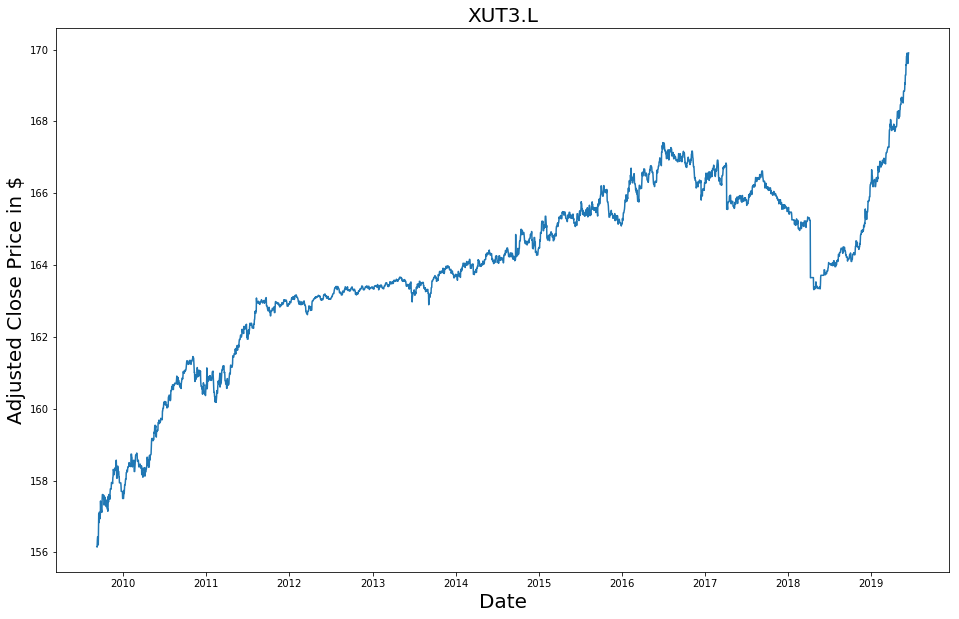

In [17]:
plt.figure(figsize=(16,10));
#plt.title("SPDR S&P 500 ETF (SPY)", fontsize=20)
plt.title(etf_rene[choice], fontsize=20)
plt.plot(df['Date'], df['Adj Close']);
plt.xlabel("Date", fontsize=20)
plt.ylabel("Adjusted Close Price in $", fontsize=20);

Use the functions defined in finance.ipynb to clean the data from NaNs and replace outliers.

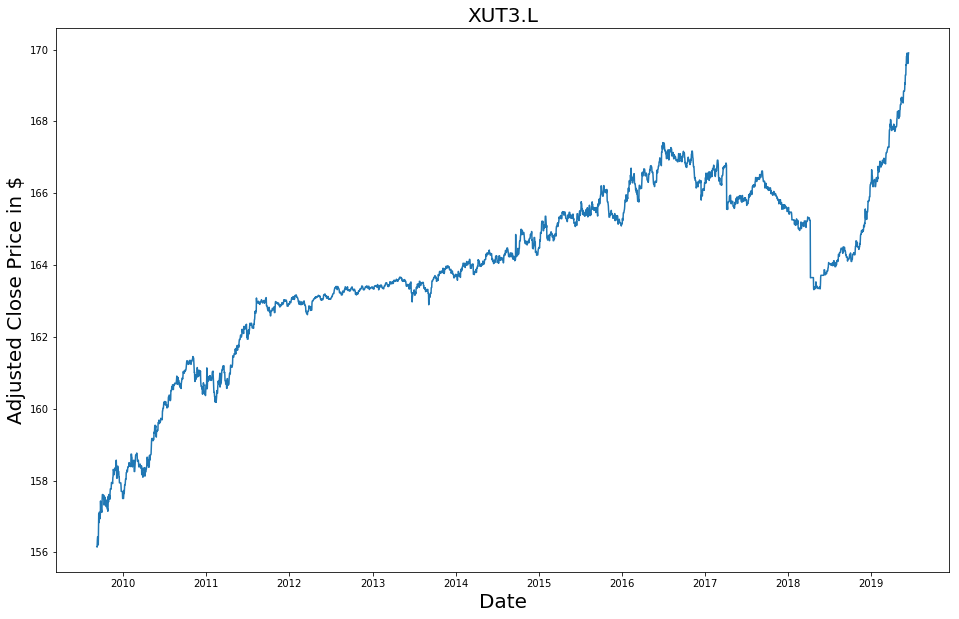

In [18]:
df = clean_data(df, outliers=True)

plt.figure(figsize=(16,10));
#plt.title("SPDR S&P 500 ETF (SPY)", fontsize=20)
plt.title(etf_rene[choice], fontsize=20)
plt.plot(df['Date'], df['Adj Close']);
plt.xlabel("Date", fontsize=20)
plt.ylabel("Adjusted Close Price in $", fontsize=20);

In the following we will have a closer look at the following timespan:

In [20]:
print("MIN =", df['Date'].min(), "MAX =", df['Date'].max())
min_date = str(df['Date'].min()).split(" ")[0]
max_date = str(df['Date'].max()).split(" ")[0]

mydf = df.copy()

MIN = 2009-09-08 00:00:00 MAX = 2019-06-14 00:00:00


In [21]:
mydf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000
mean,165.800808,165.838622,165.789614,165.794357,163.881294,524.130642
std,2.446329,2.398807,2.437928,2.437676,2.448537,2772.911467
min,155.869995,158.949997,155.869995,155.869995,156.146378,0.000000
25%,164.940002,164.944999,164.929993,164.940002,162.994659,0.000000
50%,166.009995,166.020004,166.000000,166.000000,164.042145,0.000000
75%,167.682496,167.690002,167.677498,167.684998,165.707275,65.000000
max,170.990005,170.990005,170.229996,170.059998,169.910004,104440.000000


In [22]:
#start = '1994-01-01'
#end = '2018-01-01'
start = min_date
end = max_date

In the follwing functions we want to do a monthly investment starting at date "start". Every month we buy the 100$ of the specified ETF at the current price (costs is the amount one has to spend when buying the ETF, while TER is the total expense ratio which is the amount one has to spend as fraction of the investment per year for owning the ETF) until the date "end". After that we compute the average yearly return of the ETF.

In [26]:
#inv = stock_return(min_date, max_date, df)
#inv = stock_return('2011-05-01', '2019-05-31', df)
inv = simulate_investment(start, end, mydf, interval='monthly', amount=100, costs=0.0, TER=0.0012)

In [27]:
annual_return = invest_return_yearly(inv)

In [29]:
print("Annual return of ETF = {0:.2f}%".format(annual_return))

Annual return of ETF = 0.32%


We can compare this with the average yearly price change of the used ETF from beginning to end.

In [30]:
mydf1 = mydf.copy()
years = int((mydf1['Date'].max()-mydf1['Date'].min()).days/365)
mydf1.set_index('Date', inplace=True)
p0 = mydf1["Adj Close"].loc[start]
p1 = mydf1["Adj Close"].loc[end]
print("Annual change of ETF price alone = {0:.2f}%".format((p1/p0-1)/years*100))

Annual change of ETF price alone = 0.98%


Now we compute the average return for different timeframes by starting at some start-date and performing the above used simulation of investment with monthly investing for this start-date. After that we move the start-date into the future and do the same calculation. Thus, we get multiple investing simulations for one timeframe by using different start-dates and are able to get a statistic.

In [39]:
### timeframe of investing in years
timeframe = [1, 2, 5]#, 10, 15, 20]

#returns = np.zeros((len(timeframe), num_months - adjust_month + 1))
#dates = np.array((len(timeframe), num_months - adjust_month + 1))
returns = []
dates = []

year = int(start.split("-")[0])
for n, tf in enumerate(timeframe):
    print("Compute timeframe ", tf)
    #returns[n][0] = tf
    #dates[n][0] = str(tf)
    return_list = []
    date_list = []
    
    ### Compute iteration parameters
    start = min_date
    end = max_date

    if int(start.split("-")[2])>28:
        ## if day > 28 (no february data) start in the following month on the 1st day
        start_day = 1
        adjust_month = 1
    else:
        start_day = int(start.split("-")[2])
        adjust_month = 0
    day = start_day
    last_start = str(int(end.split("-")[0])-tf) + "-" + end.split("-")[1] + "-" + end.split("-")[2]
    print(start, end, last_start)
    num_months = (int(last_start.split("-")[0]) - int(start.split("-")[0]) - 1)*12
    num_months += 12 - int(start.split("-")[1])
     ### one month less to make sure enddate of last_start is not later than end
    num_months += 11 - int(last_start.split("-")[1])
    year = int(start.split("-")[0])
    
    for m in range(adjust_month, num_months):
        ## if day > 28 (no february data) start in the following month on the 1st day
        month = (int(start.split("-")[1]) + m) % 12 
        if month == 0:
            month = 12
        if month == 1 and m != 0:
            year += 1
        #print(month)
        str_day = "0" + str(day) if len(str(day)) == 1 else str(day)
        str_month = "0" + str(month) if len(str(month)) == 1 else str(month)
        start_date = str(year) + "-" + str_month + "-" + str_day
        end_date = str(int(start_date.split("-")[0]) + tf) + "-" + start_date.split("-")[1] + "-" + start_date.split("-")[2]
        #print(start_date, end_date)
        inv = simulate_investment(start_date, end_date, mydf, interval='monthly', amount=100, costs=0.0, TER=0.009)
        #returns[n][m + 1] = invest_return_yearly(inv)
        #dates[n][m + 1] = start_date + "_" + end_date
        return_list.append(invest_return_yearly(inv))
        date_list.append(start_date+"_"+end_date)
        #print(return_list)
    returns.append(return_list)
    dates.append(date_list)
        
#np.save("year_return_timeframe.npy", returns)
#np.save("dates_timeframe.npy", dates)

Compute timeframe  1
2009-09-08 2019-06-14 2018-06-14
Compute timeframe  2
2009-09-08 2019-06-14 2017-06-14
Compute timeframe  5
2009-09-08 2019-06-14 2014-06-14


The following shows a fraction of all computed returns for the first used timeframe:

In [41]:
returns[0][:10]

[0.7844051976723332,
 0.9272191679100539,
 0.7166574313913543,
 0.2557615149585635,
 0.13502295219447458,
 -0.24909203302536653,
 -0.11496320357393675,
 -0.24894975981103462,
 0.13022138353315782,
 0.4064625416009049]

Here, we see the descriptive statistics of the different timeframes and can see that the variance should get smaller as the timeframe increases.

In [42]:
frames = []
means, std = [], []
for m, tf in enumerate(timeframe):
    data = returns[m][1:]
    ind = dates[m][1:]
    frame = pd.DataFrame(data, index=ind, columns=["returns"])
    frames.append(frame)
    print("Statistics for timeframe ", tf, " years")
    print(frame.describe())
    means.append(float(frame.describe().iloc[1]))
    std.append(float(frame.describe().iloc[2]))
means = np.array(means)
std = np.array(std)

Statistics for timeframe  1  years
          returns
count  103.000000
mean    -0.220104
std      0.472252
min     -1.729544
25%     -0.404257
50%     -0.248950
75%      0.054591
max      1.148708
Statistics for timeframe  2  years
         returns
count  91.000000
mean   -0.269434
std     0.304779
min    -1.240924
25%    -0.381564
50%    -0.238869
75%    -0.077263
max     0.299617
Statistics for timeframe  5  years
         returns
count  55.000000
mean   -0.279695
std     0.151598
min    -0.657746
25%    -0.345890
50%    -0.226672
75%    -0.166870
max    -0.087136


In the next figure we see the above statistics in a single plot: We plot the average yearly return as a function of the timeframe. The shaded region shows the 90% confidence interval for the return (given by two times the standard deviation).

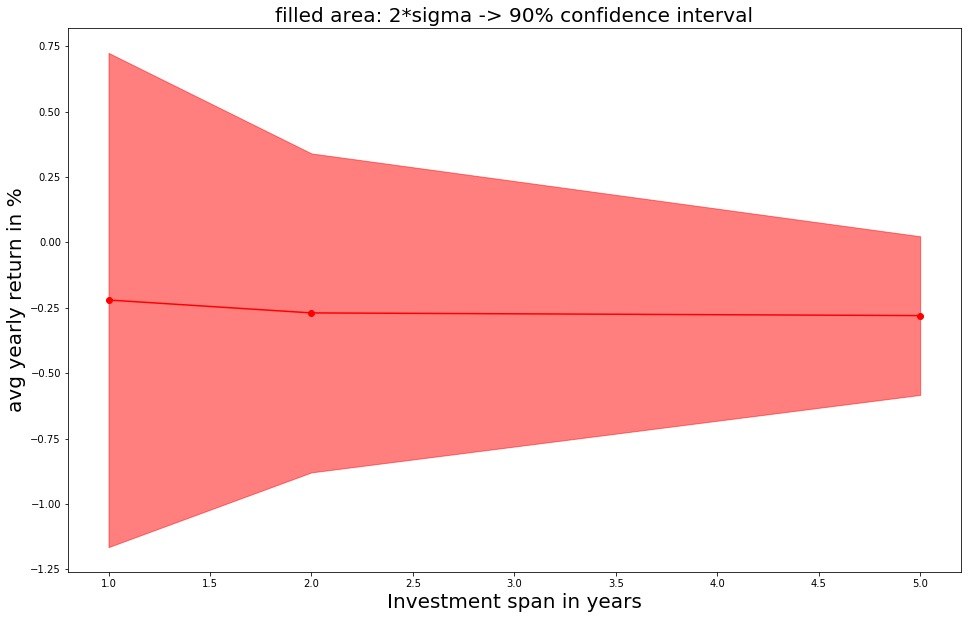

In [43]:
fig = plt.figure(figsize=(16,10));

plt.plot(np.array(timeframe), means, 'ro-');
plt.fill_between(np.array(timeframe), means - 2*std, means + 2*std, color='r', alpha=0.5);

#plt.ylim(-15,25);

plt.xlabel("Investment span in years", fontsize=20);
plt.ylabel("avg yearly return in %", fontsize=20);

plt.title("filled area: 2*sigma -> 90% confidence interval", fontsize=20);

plt.show()

These histograms show the distribution of yearly averaged returns for the different timeframes. We see that for shorter timeframes the risk is larger, meaning that more extreme outcomes are occuring compared to larger timeframes (the width of the distribution decreases meaning the risk or variance goes down).

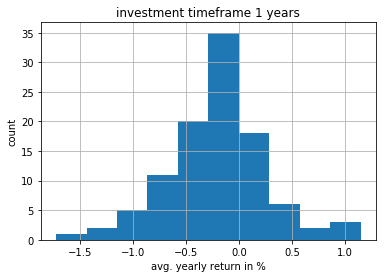

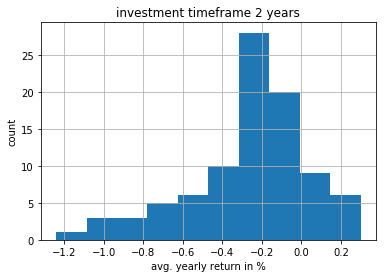

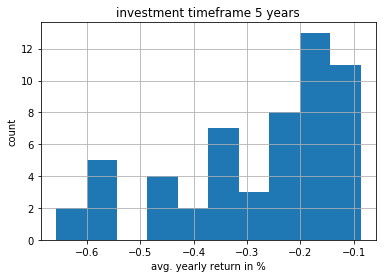

In [44]:
for m, tf in enumerate(timeframe):
    data = frames[m]
    data.hist()
    plt.title("investment timeframe "+ str(tf)+ " years");
    plt.xlabel("avg. yearly return in %");
    plt.ylabel("count");